In [2]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
import glob
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Process data

In [ ]:
trace_list = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regtrace*')
bind_list = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regbin*')
coord_list = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*labcoor*')
trace_list, bind_list, coord_list

In [ ]:
n_neigh = 15 #15
dim = [.8, .8, 15]
reg_list = ['all', 'Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_list)):

    trace = np.load(trace_list[i])
    bind = np.load(bind_list[i])
    coord = (np.load(coord_list[i]))
    name = adfn.save_name(trace_list[i])

    for reg in reg_list:
        sub_trace, sub_bind, sub_coord = tfn.select_region(trace, bind, coord, reg)
        data = tfn.trace_analyse(name).criticality(sub_trace, sub_bind, sub_coord, n_neigh, dim)
        np.save(Fdata + 'BLNLIGHTPTZ-FOXG1/' + name + '_' + reg + '_criticality.npy', data.__dict__)
    print('Processed ' + name)

In [3]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbinarised*'))
coordlist =  sorted(glob.glob('*labcoord*'))
coordlist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'B

In [24]:
len(coordlist), len(binlist)

(35, 35)

In [49]:
dim = [.8, .8, 15] 

#NNB
for i in range(len(coordlist)):
    name = coordlist[i][:coordlist[i].find('run')+7]
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'all')
    
    sub_trace = sub_trace[:,:9828]
    
    data = np.multiply(sub_coord[:,:3].astype(float), dim)   
    nnb = crfn.neighbour(data, 10)
    np.save(savepath + name + 'nnb_10.npy', nnb)
    print(str(i) + 'of ' + str(len(coordlist)))

0of 35
1of 35
2of 35
3of 35
4of 35
5of 35
6of 35
7of 35
8of 35
9of 35
10of 35
11of 35
12of 35
13of 35
14of 35
15of 35
16of 35
17of 35
18of 35
19of 35
20of 35
21of 35
22of 35
23of 35
24of 35
25of 35
26of 35
27of 35
28of 35
29of 35
30of 35
31of 35
32of 35
33of 35
34of 35


In [50]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbinarised*'))
nnblist =  sorted(glob.glob('*nnb*10*'))
nnblist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_nnb_10.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2pho

###### dim = [.8, .8, 15] 
np.multiply(np.load(coordlist[0]), dim)   


In [51]:
#Avalanches
for i in range(len(nnblist)):
    name = nnblist[i][:nnblist[i].find('run')+7]
    
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'all')
    
    sub_trace = sub_trace[:,:9828]
    
    av, pkg = crfn.avalanche(np.load(nnblist[i]), sub_trace)
    np.save(savepath + name + 'av.npy', av)
    np.save(savepath + name + 'pkg.npy', pkg)
    print(name)
    print(np.max(av[0]))
    print(np.max(av[1])/2.73)
    print(str(i) + 'of ' + str(len(nnblist)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
29851
79.85347985347985
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
2503987
3599.6336996336995
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
1064
28.571428571428573
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
2523
28.937728937728938
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11879
123.07692307692308
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
16897
162.63736263736263
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4546125
3600.0
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
87183
366.6666666666667
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
1540147
3015.7509157509157
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9579
165.93406593406593
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
11427
59.70695970695971
10of 35
BLN

In [57]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*BLNLIGHT_*_av.npy*')) 
het_list = sorted(glob.glob('*+--*BLNLIGHT_*_av.npy*')) 
hom_list = sorted(glob.glob('*---*BLNLIGHT_*_av.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01

In [70]:
l_list[i][e]

'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy'

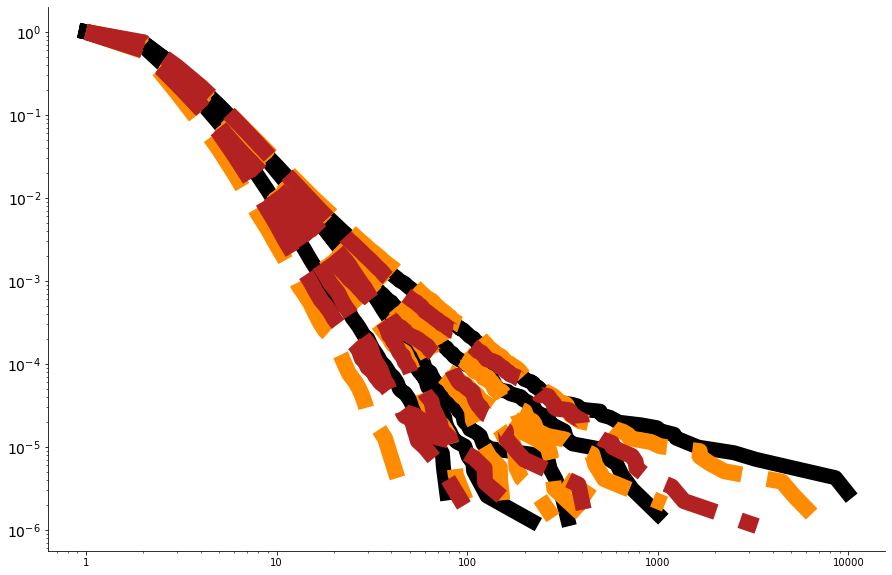

In [73]:
import matplotlib
import powerlaw
l_list = wt_list, het_list, hom_list
colors = ['black', 'darkorange','firebrick']
#xlabels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
widths = [15, 16, 16]
lines = ['-', '--', '--']
choose=1

fig, axarr = plt.subplots(figsize = (15,10))
for i in range(len(l_list)):
    for e in range(len(l_list[i])):
        avdistcut = np.load(l_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[i],linewidth =widths[i] , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
#axarr.set_ylabel('P(S)', size = '13')
#axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(xlabels, fontsize = 14)
plt.yticks(fontsize = 14)        
plt.show()

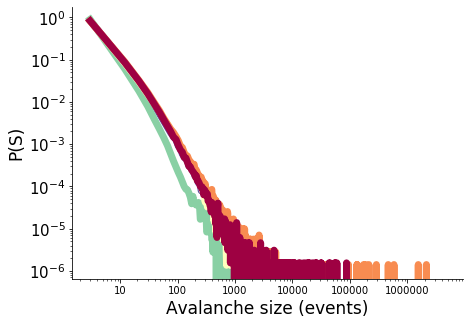

In [64]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 500000
choose = wt_list
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

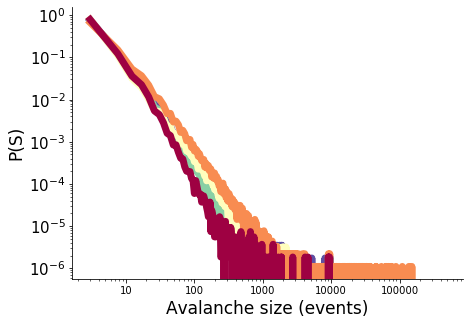

In [67]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 100000
choose = hom_list
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

In [ ]:
# LLR

In [36]:
# Av Exponents

# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av.npy*')) 
av_list

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1+--04

In [37]:
#EXPONENT
#Calculate exponents

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    exp = crfn.power_exponent(curr_av, 2000)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'exp.npy', exp)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 33
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 33
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 33
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 33
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 33
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 33
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 33
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 33
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 33
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 33
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 33
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 33
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 33
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 33
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [38]:
#LLR

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    LLR = crfn.LLR(curr_av, 2000)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'LLR.npy', LLR)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 33
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 33
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 33
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 33
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 33
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 33
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 33
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 33
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 33
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 33
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 33
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 33
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 33
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 33
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [8]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av.npy*')) [25:]
av_list

['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_BLNLIGHT_run-01_av.npy',
 'BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_av.npy']

In [9]:
#Exponent relations

#Calculate empirical exponent relation

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    dcc = crfn.DCC(curr_av)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'dcc.npy', dcc)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 10
BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_
1of 10
BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 10
BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_
3of 10
BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 10
BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_
5of 10
BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 10
BLNLIGHTPTZ-FOXG1---05_2photon_sess-01-6dpf_PTZ02_run-01_
7of 10
BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_BLNLIGHT_run-01_
8of 10
BLNLIGHTPTZ-FOXG1---06_2photon_sess-01-6dpf_PTZ02_run-01_
9of 10


In [32]:
# Visualise 
#---------------------------------------------------------------------------
bin_list = sorted(glob.glob('*BLNLIGHT*_bin*.npy*')) 
bin_list

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_binarised.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_binarised.npy',
 'BL

In [35]:
# Branching ratio

#Calculate BR in empirical data

for e in range(len(bin_list)):
    ratio = 0
    prac = np.load(bin_list[e])[:,:9828]
    for i in range(prac.shape[1]-1):
        ratio = ratio + np.sum(prac[:,i+1])/np.sum(prac[:,i])
    ratio = ratio/(prac.shape[1]-1)
    
    name = bin_list[e][:bin_list[e].find('run')+7] 
    np.save(savepath + name + '-branch.npy', ratio)
    print(name)
    print(str(e) + 'of ' + str(len(bin_list)))

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [ ]:


# Functional connectivity - Distance

In [39]:
#Find range to make bin over for correlation function
coord_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regcoord*')
coord_l

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOX

In [40]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regtrace*')
coord_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*labcoor*')
len(trace_l), len(coord_l)

(35, 35)

In [43]:
for i in range(len(coord_l)):
    sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(np.load(trace_l[i]), np.load(trace_l[i]), np.load(trace_l[i]), np.load(coord_l[i]), 'all')
    dist = euclidean_distances(sub_coord) 
    corr = np.corrcoef(sub_trace) #Calculate correlation matrix
    corrdis = crfn.corrdist(corr, dist, 200, 0, 670)
    
    name = coord_l[i][:coord_l[i].find('run')+7] 
    np.save(savepath + name + '-corrdist.npy', corrdis)
    print(name)
    print(str(i) + 'of ' + str(len(coord_l)))

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of